In [1]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [2]:
data=pd.read_csv("transactions.csv",index_col=0)
data.dropna()
data.drop_duplicates(['customerEmail'])
print(data.shape)
print(list(data.columns))

(623, 10)
['customerEmail', 'transactionId', 'orderId', 'paymentMethodId', 'paymentMethodRegistrationFailure', 'paymentMethodType', 'paymentMethodProvider', 'transactionAmount', 'transactionFailed', 'orderState']


In [3]:
data.head()

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [4]:
data.drop_duplicates(['transactionId','orderId','paymentMethodRegistrationFailure'])
data.shape

(623, 10)

In [5]:
data['paymentMethodProvider'].unique()

array(['JCB 16 digit', 'American Express', 'VISA 16 digit', 'Discover',
       'Voyager', 'VISA 13 digit', 'Maestro', 'Mastercard',
       'Diners Club / Carte Blanche', 'JCB 15 digit'], dtype=object)

In [6]:
data['paymentMethodProvider']=np.where(data['paymentMethodProvider']=='JCB 16 digit','JCB',data['paymentMethodProvider'])
data['paymentMethodProvider']=np.where(data['paymentMethodProvider']=='VISA 13 digit','VISA',data['paymentMethodProvider'])
data['paymentMethodProvider']=np.where(data['paymentMethodProvider']=='VISA 16 digit','VISA',data['paymentMethodProvider'])
data['paymentMethodProvider']=np.where(data['paymentMethodProvider']=='JCB 15 digit','JCB',data['paymentMethodProvider'])


In [7]:
data['paymentMethodProvider'].unique()

array(['JCB', 'American Express', 'VISA', 'Discover', 'Voyager',
       'Maestro', 'Mastercard', 'Diners Club / Carte Blanche'],
      dtype=object)

In [8]:
data.rename(columns={"transactionFailed":"y"},inplace=True)
print(list(data.columns))

['customerEmail', 'transactionId', 'orderId', 'paymentMethodId', 'paymentMethodRegistrationFailure', 'paymentMethodType', 'paymentMethodProvider', 'transactionAmount', 'y', 'orderState']


In [9]:
data['y'].value_counts()

0    455
1    168
Name: y, dtype: int64

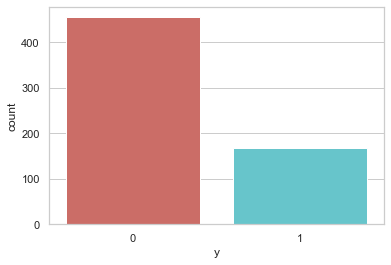

<Figure size 432x288 with 0 Axes>

In [10]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')


In [11]:
data.groupby('y').mean()

,paymentMethodRegistrationFailure,transactionAmount
y,,
0,0.131868,34.569231
1,0.130952,34.678571


In [12]:
data.groupby('paymentMethodType').mean()

,paymentMethodRegistrationFailure,transactionAmount,y
paymentMethodType,,,
apple pay,0.061224,36.979592,0.265306
bitcoin,0.404255,34.957447,0.234043
card,0.121086,34.929019,0.279749
paypal,0.041667,28.520833,0.208333


In [13]:
data.groupby('paymentMethodProvider').mean()

,paymentMethodRegistrationFailure,transactionAmount,y
paymentMethodProvider,,,
American Express,0.200000,31.622222,0.266667
Diners Club / Carte Blanche,0.189655,32.103448,0.362069
Discover,0.195122,27.512195,0.414634
JCB,0.073620,36.644172,0.245399
Maestro,0.144928,31.681159,0.260870
Mastercard,0.000000,35.906250,0.218750
VISA,0.207792,38.298701,0.253247
Voyager,0.000000,31.737705,0.229508


In [14]:
data.groupby('orderState').mean()

,paymentMethodRegistrationFailure,transactionAmount,y
orderState,,,
failed,0.111111,36.333333,0.222222
fulfilled,0.135659,34.467054,0.263566
pending,0.113636,33.659091,0.409091


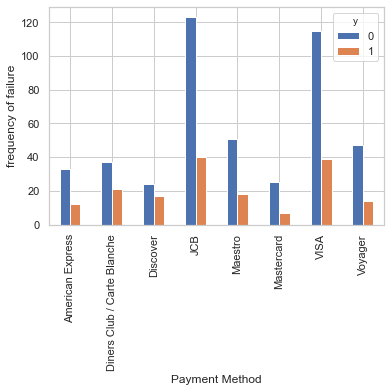

In [15]:
%matplotlib inline
pd.crosstab(data.paymentMethodProvider,data.y).plot(kind='bar')
plt.xlabel('Payment Method')
plt.ylabel('frequency of failure')
plt.savefig('failures from providers')

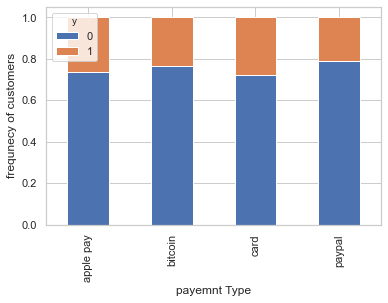

In [16]:
table=pd.crosstab(data.paymentMethodType,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('payemnt Type')
plt.ylabel('frequnecy of customers')
plt.savefig('Paymenttype with customers')

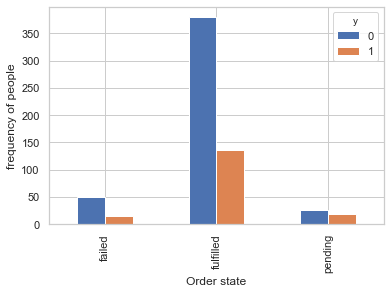

In [17]:
pd.crosstab(data.orderState,data.y).plot(kind='bar')
plt.xlabel('Order state')
plt.ylabel('frequency of people')
plt.savefig('orderstate failures')

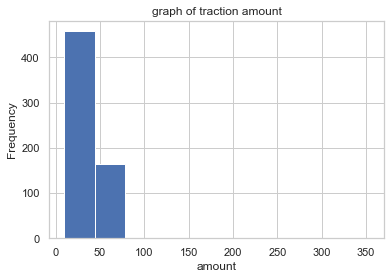

In [18]:
data.transactionAmount.hist()
plt.title('graph of traction amount')
plt.xlabel('amount')
plt.ylabel('Frequency')
plt.savefig('histogram on amount')

## to create dummy variable

In [19]:
cat_var=['paymentMethodProvider','paymentMethodType','orderState']
for var in cat_var:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(data[var],prefix=var)
    data1=data.join(cat_list,lsuffix='_left')
    data=data1
print(data.head())

            customerEmail transactionId orderId paymentMethodId  \
0  josephhoward@yahoo.com      a9lcj51r  vjbdvd       wt07xm68b   
1  josephhoward@yahoo.com      y4wcv03i  yp6x27       wt07xm68b   
2  evansjeffery@yahoo.com      5mi94sfw  nlghpa       41ug157xz   
3  evansjeffery@yahoo.com      br8ba1nu  uw0eeb       41ug157xz   
4  evansjeffery@yahoo.com      a33145ss  bn44oh       y3xp697jx   

   paymentMethodRegistrationFailure paymentMethodType paymentMethodProvider  \
0                                 1              card                   JCB   
1                                 1              card                   JCB   
2                                 0           bitcoin      American Express   
3                                 0           bitcoin      American Express   
4                                 1           bitcoin                  VISA   

   transactionAmount  y orderState  ...  paymentMethodProvider_Mastercard  \
0                 18  0    pending  ...      

In [20]:
cat_vars=['paymentMethodProvider','paymentMethodType','orderState','transactionAmount']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_keep.remove("customerEmail")
to_keep.remove("transactionId")
to_keep.remove("orderId")
to_keep.remove("paymentMethodId")

print(to_keep)

['paymentMethodRegistrationFailure', 'y', 'paymentMethodProvider_American Express', 'paymentMethodProvider_Diners Club / Carte Blanche', 'paymentMethodProvider_Discover', 'paymentMethodProvider_JCB', 'paymentMethodProvider_Maestro', 'paymentMethodProvider_Mastercard', 'paymentMethodProvider_VISA', 'paymentMethodProvider_Voyager', 'paymentMethodType_apple pay', 'paymentMethodType_bitcoin', 'paymentMethodType_card', 'paymentMethodType_paypal', 'orderState_failed', 'orderState_fulfilled', 'orderState_pending']


In [21]:
dataf=data[to_keep]
print(dataf.columns.values)


['paymentMethodRegistrationFailure' 'y'
 'paymentMethodProvider_American Express'
 'paymentMethodProvider_Diners Club / Carte Blanche'
 'paymentMethodProvider_Discover' 'paymentMethodProvider_JCB'
 'paymentMethodProvider_Maestro' 'paymentMethodProvider_Mastercard'
 'paymentMethodProvider_VISA' 'paymentMethodProvider_Voyager'
 'paymentMethodType_apple pay' 'paymentMethodType_bitcoin'
 'paymentMethodType_card' 'paymentMethodType_paypal' 'orderState_failed'
 'orderState_fulfilled' 'orderState_pending']


In [22]:
dataf_var=dataf.columns.values.tolist()
y=['y']
X=[i for i in dataf_var if i not in y]
print(X)


['paymentMethodRegistrationFailure', 'paymentMethodProvider_American Express', 'paymentMethodProvider_Diners Club / Carte Blanche', 'paymentMethodProvider_Discover', 'paymentMethodProvider_JCB', 'paymentMethodProvider_Maestro', 'paymentMethodProvider_Mastercard', 'paymentMethodProvider_VISA', 'paymentMethodProvider_Voyager', 'paymentMethodType_apple pay', 'paymentMethodType_bitcoin', 'paymentMethodType_card', 'paymentMethodType_paypal', 'orderState_failed', 'orderState_fulfilled', 'orderState_pending']


In [23]:
!pip install imbalanced-learn

In [24]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import train_test_split
X=dataf.loc[:,dataf.columns!='y']
y=dataf.loc[:,dataf.columns=='y']
os=SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns=X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train,y_train)
os_data_X=pd.DataFrame(data=os_data_X,columns=columns)
os_data_y=pd.DataFrame(data=os_data_y,columns=['y'])


print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))


length of oversampled data is  616
Number of no subscription in oversampled data 308
Number of subscription 308
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


## Applyling Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.feature_selection import RFE
lreg=LogisticRegression()
rfe=RFE(lreg,20)
rfe=rfe.fit(os_data_X,os_data_y.values.ravel())
print(rfe.ranking_)
print(rfe.support_)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [26]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.572202
         Iterations 5


C:\Users\sahiti naidu\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\sahiti naidu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\sahiti naidu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\sahiti naidu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                                                 Results: Logit
Model:                               Logit                            Pseudo R-squared:                 0.018   
Dependent Variable:                  y                                AIC:                              740.9639
Date:                                2020-03-09 22:26                 BIC:                              803.0476
No. Observations:                    623                              Log-Likelihood:                   -356.48 
Df Model:                            13                               LL-Null:                          -363.16 
Df Residuals:                        609                              LLR p-value:                      0.42052 
Converged:                           1.0000                           Scale:                            1.0000  
No. Iterations:                      5.0000                                                                     
--------------------------------

In [27]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\sahiti naidu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


## Using Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
print(cf)
plt.show()

[[146   1]
 [ 40   0]]


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.88       147
           1       0.00      0.00      0.00        40

    accuracy                           0.78       187
   macro avg       0.39      0.50      0.44       187
weighted avg       0.62      0.78      0.69       187



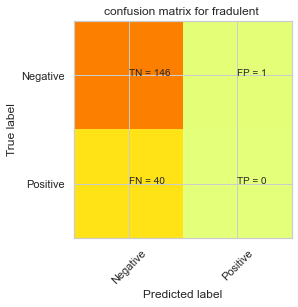

In [31]:
plt.clf()
plt.imshow(cf, interpolation='nearest',cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('confusion matrix for fradulent ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cf[i][j]))
plt.show()
